# DAY 6 Exercise 1

In [1]:
# install packages if they were not installed in your local environment
install.packages("ggplot2")
install.packages("lattice")
install.packages("ggpubr")

package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpCIEUI6\downloaded_packages
package 'lattice' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpCIEUI6\downloaded_packages
package 'ggpubr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpCIEUI6\downloaded_packages


In [2]:
options(warn = -1)

In [3]:
data("iris") # Loading
head(iris, n = 3) # Print the first n = 3 rows

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


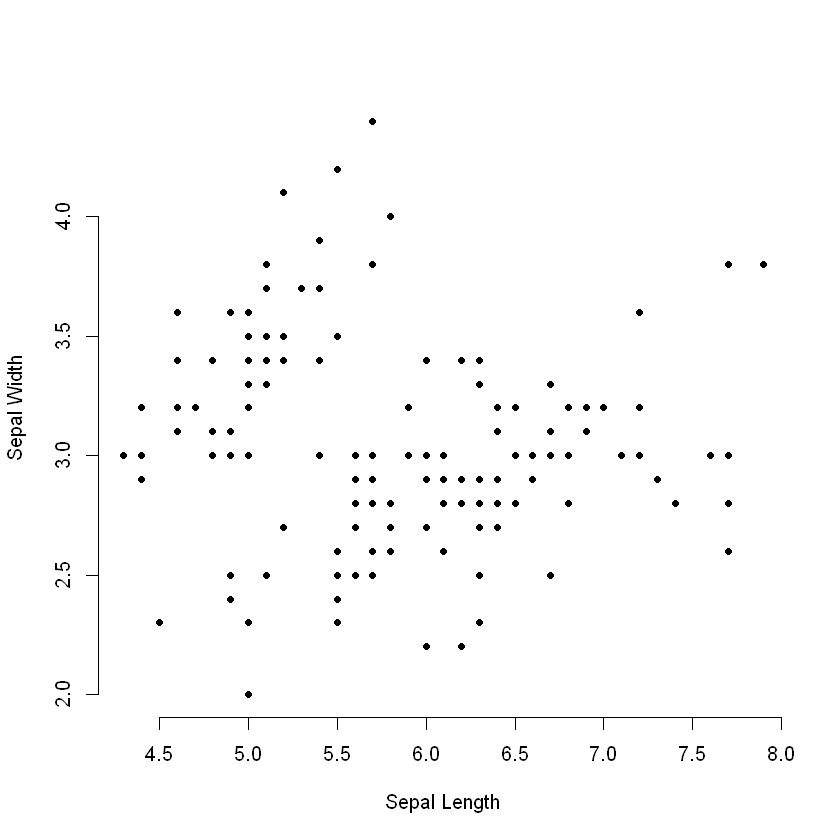

In [4]:
## ----r-base-graphics-examples, echo = -1, fig.width=3.3------------------ par(mar = c(4, 4, 1, 1))
# (1) Create a scatter plot
plot(
    x = iris$Sepal.Length, y = iris$Sepal.Width,
    pch = 19, cex = 0.8, frame = FALSE,
    xlab = "Sepal Length",ylab = "Sepal Width"
)

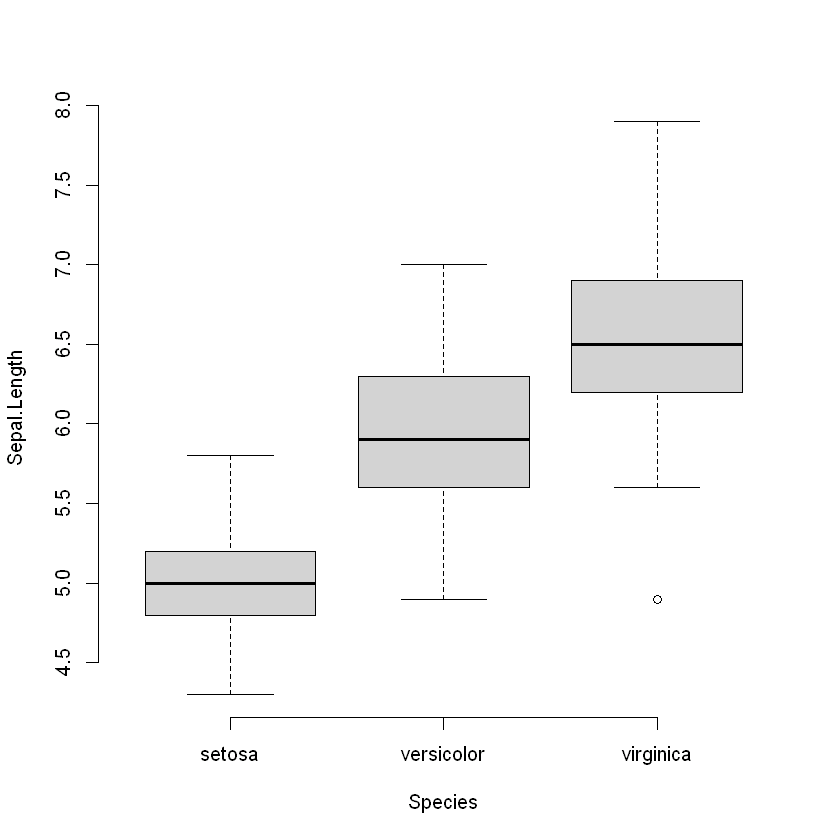

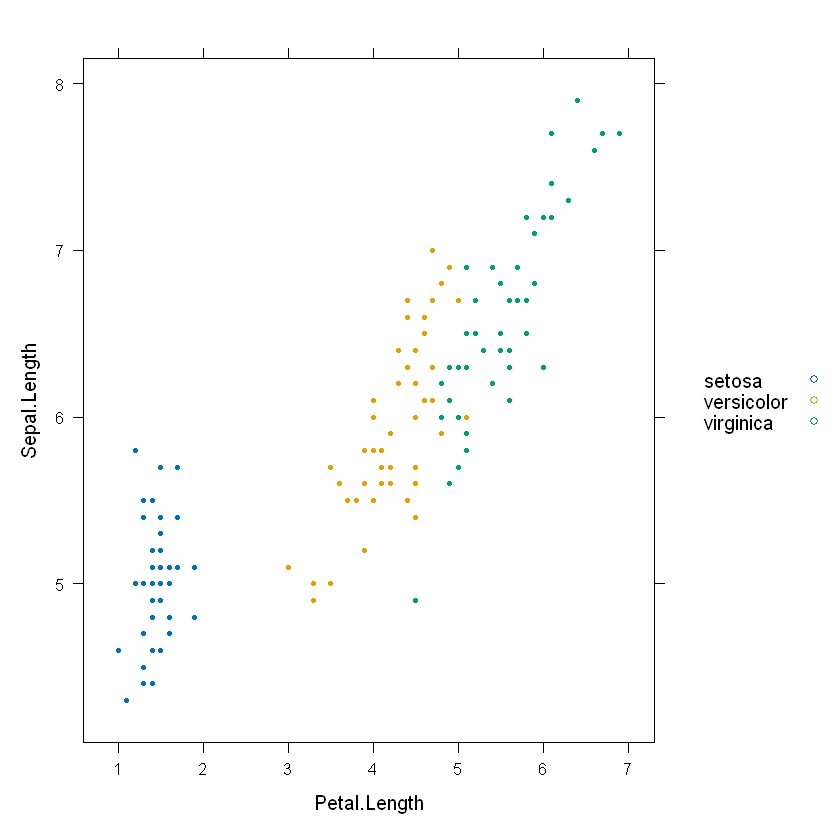

In [5]:
# (2) Create a box plot
boxplot(
    Sepal.Length ~ Species, data = iris,
    ylab = "Sepal.Length",
    frame = FALSE, col = "lightgray"
)

library(lattice)
xyplot(
    Sepal.Length ~ Petal.Length, group = Species,
    data = iris, auto.key = TRUE, pch = 19, cex = 0.5
)

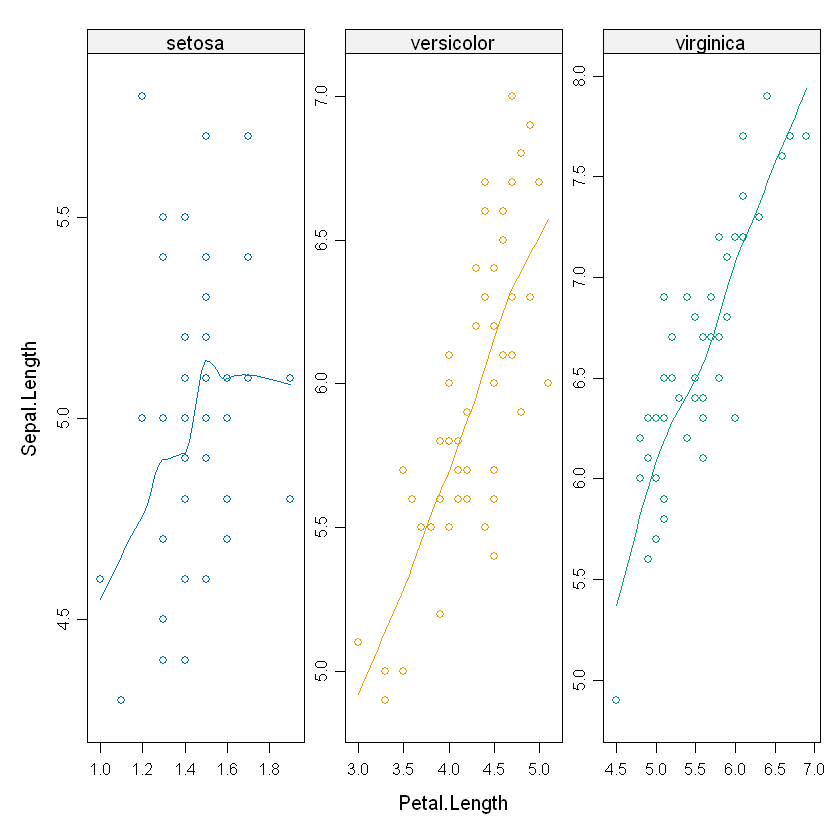

In [6]:
## ----lattice-scatter-plot-multiple-panels, fig.width=6, fig.height=2.7---- 
xyplot(
    Sepal.Length ~ Petal.Length | Species,
    layout = c(3, 1), # panel with ncol = 3 and nrow = 1
    group = Species, data = iris,
    type = c("p", "smooth"), # Show points and smoothed line
    scales = "free" # Make panels axis scales independent
)

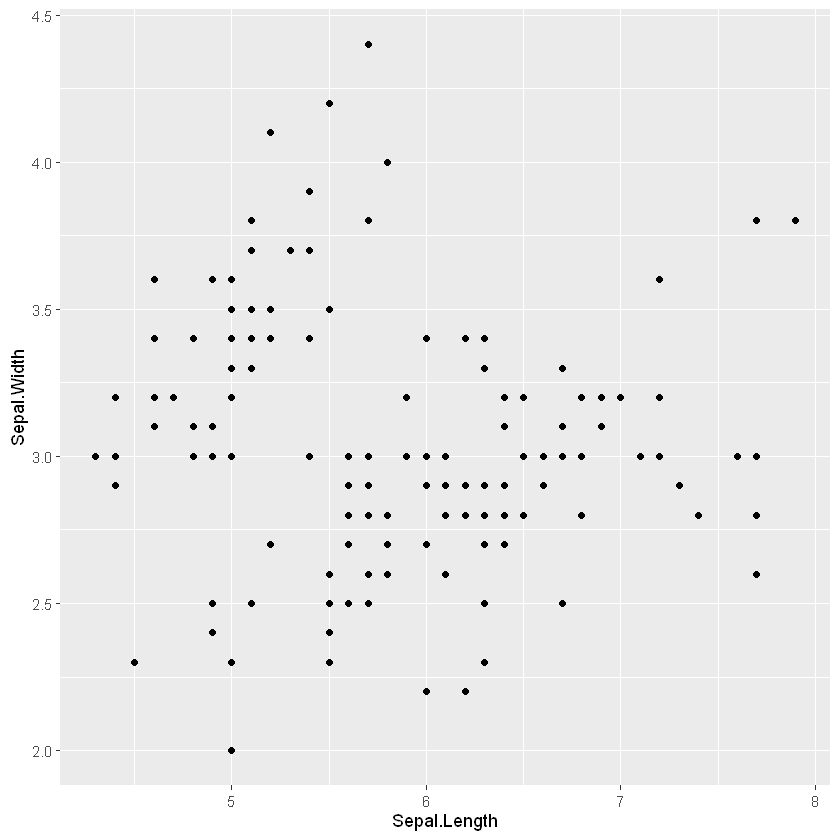

In [7]:
library(ggplot2)
ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width))+
    geom_point()

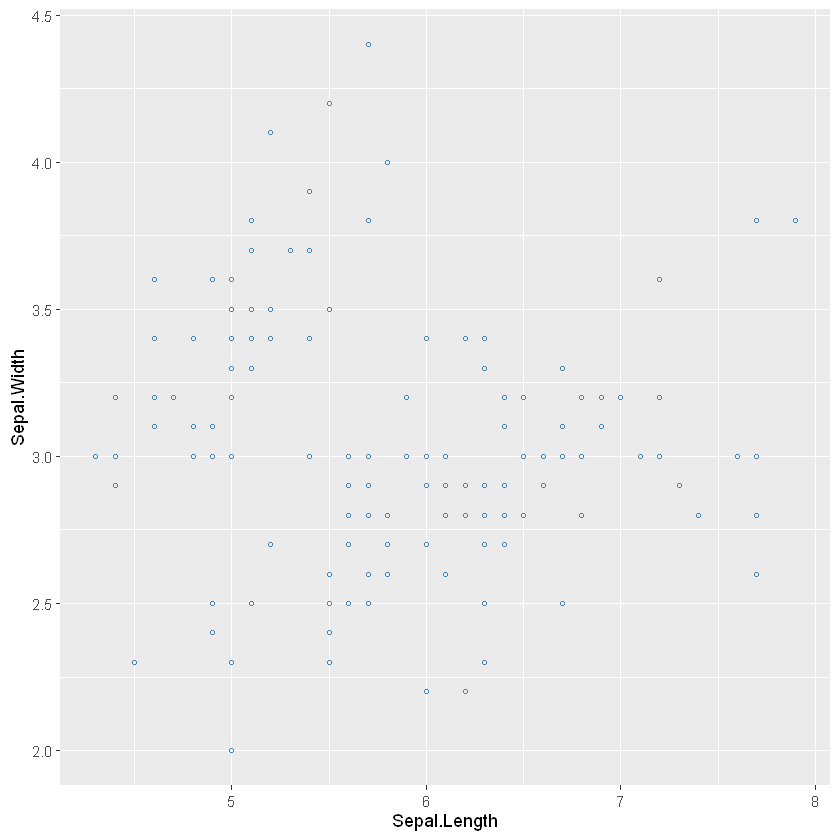

In [8]:
# Change point size, color and shape
ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width))+
geom_point(size = 1.2, color = "steelblue", shape = 21)

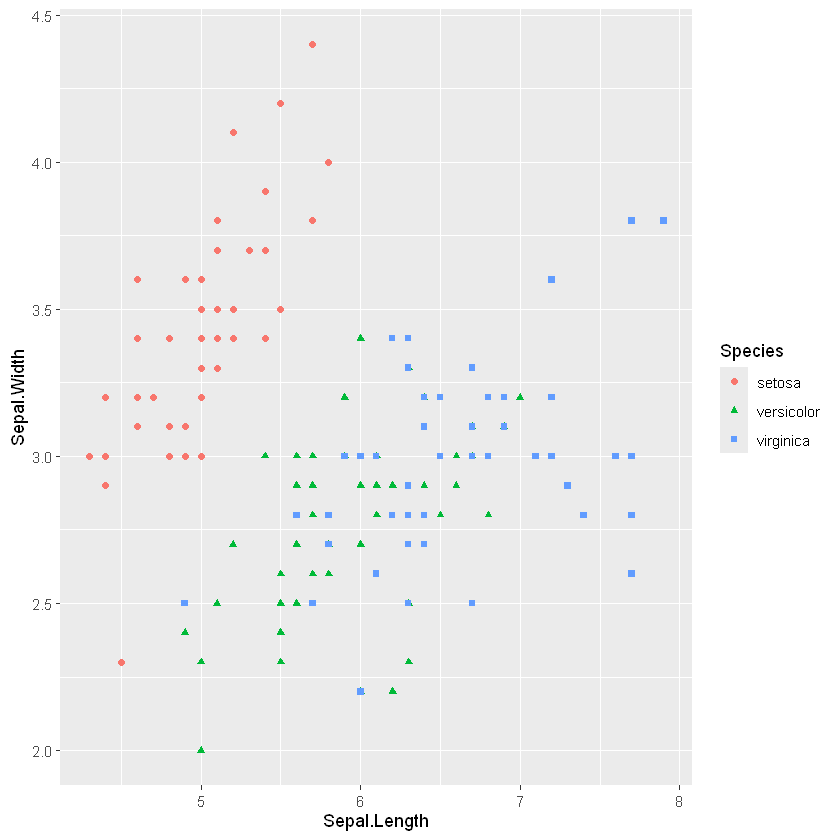

In [9]:
## ----plotting-symbol, fig.width=2.3, fig.height=2.3, eval = FALSE-------- ## ggpubr::show_point_shapes()
## ----ggplot-aesthetic-mapping-control-points-color-shape-and-size, fig.width=3.3,fig.height=2.7---- 
# Control points color by groups
ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width))+
geom_point(aes(color = Species, shape = Species))

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


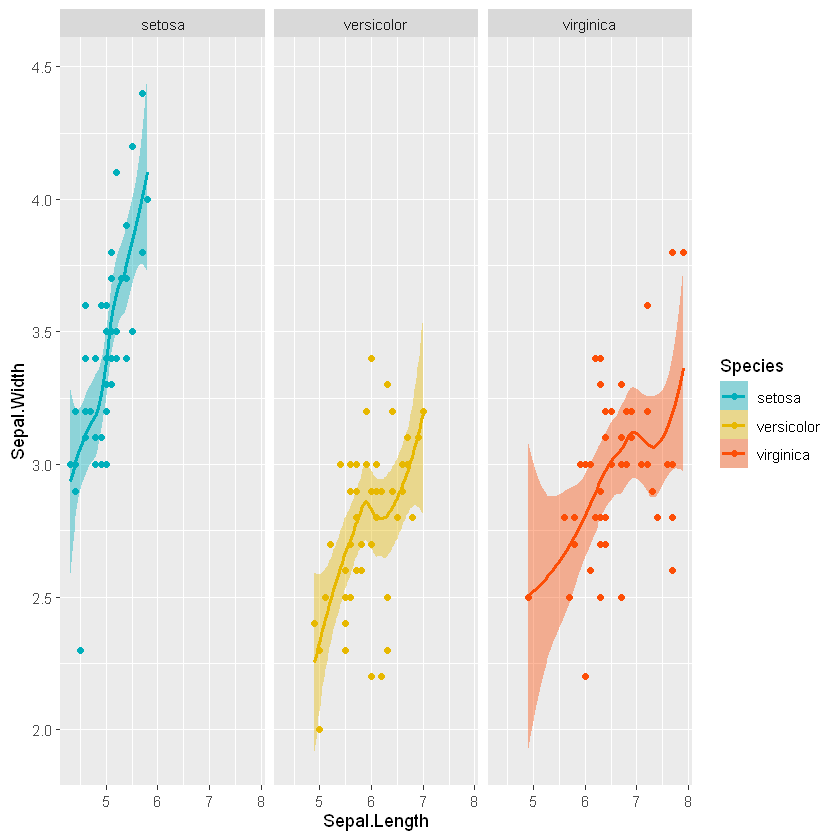

In [10]:
# Change the default color manually.
## ----ggplot-scatter-plot-with-regression-line, fig.width=6.5, fig.height=2.7---- 
ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width)) + 
    geom_point(aes(color = Species)) +
    geom_smooth(aes(color = Species, fill = Species)) +
    facet_wrap(~Species, ncol = 3, nrow = 1) +
    scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07")) +
    scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07"))

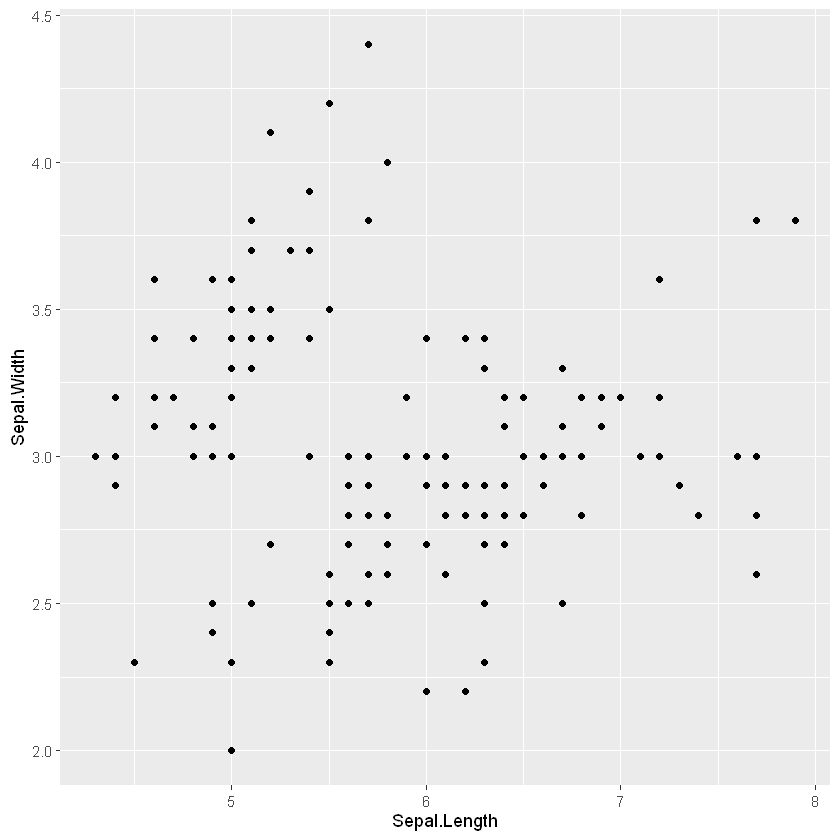

In [11]:
## ----ggplot-examples-of-plots, fig.width=3, fig.height=2.5--------------- 
ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width))+
    geom_point()

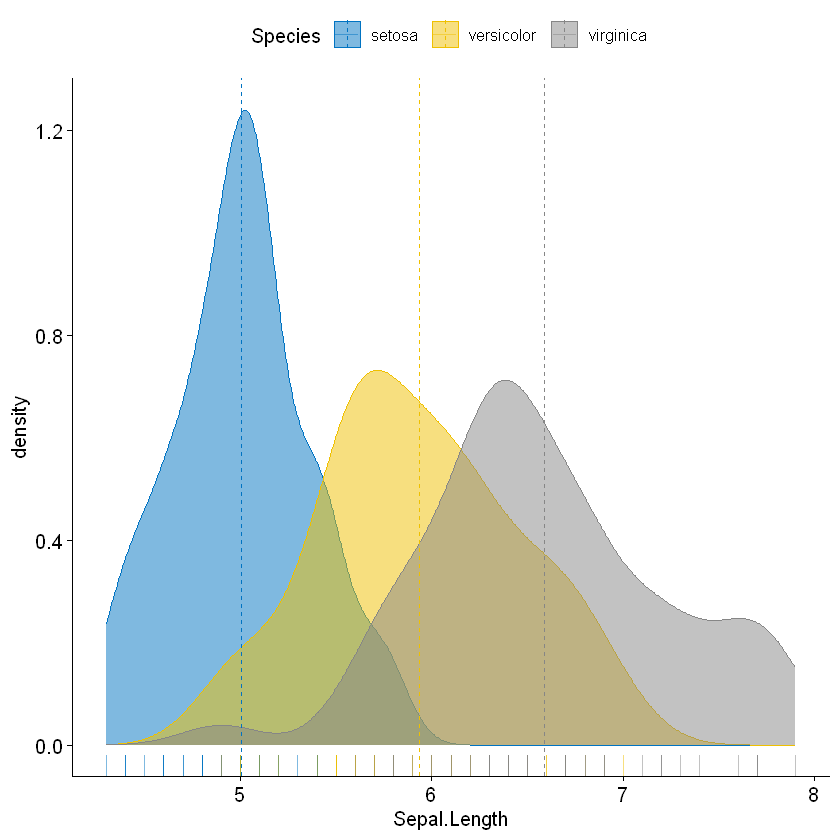

In [12]:
## ----ggpubr-density-plot, fig.width=3, fig.height=3, warning=FALSE, fig.show="asis"----
library(ggpubr)
# Density plot with mean lines and marginal rug
ggdensity(
    iris, x = "Sepal.Length",
    add = "mean", rug = TRUE, # Add mean line and marginal rugs
    color = "Species", fill = "Species", # Color by groups
    palette = "jco"  # use jco journal color palette
)

In [13]:
## ----ggpubr-box-plot-with-strip-charts-and-p-values, fig.width=4, fig.height=4, fig.show="asis"----
# Groups that we want to compare
my_comparisons <- list(
    c("setosa", "versicolor"), 
    c("versicolor", "virginica"),
    c("setosa", "virginica")
)